In [1]:
from komoran3py import KomoranPy

In [2]:
import nltk
import pandas as pd
import numpy as np

In [3]:
ko = KomoranPy()

In [4]:
ko.set_user_dictionary('./user_dictionary.txt')

In [5]:
with open('../../../data/twitch_live_chat/#zilioner/2018-12-15_#zilioner.log') as f : 
    text = f.readlines()

In [6]:
text

['# Log started: 2018-12-15 21:52:42 +0900\n',
 '[21:52:42] <jatbab1004> Ïò§ÎäòÏùÄ Î∞îÏöî„Öó„Öá ÏïàÌïòÎÇòÏöî\n',
 '[21:52:58] <jatbab1004> YouWHY\n',
 '[21:59:33] <Ïä§Ìä∏Î£© (dkdmrldmdl)> Ïπ®Ìïò\n',
 '[21:59:35] <Ïä§Ìä∏Î£© (dkdmrldmdl)> ÏôÄ!\n',
 '[21:59:36] <Î°úÏïåÌåå (bg4538)> ÏïÑÏù¥Í≥† ÏàòÏû•Îãò „Ö†„Ö†\n',
 '[21:59:37] <twfranken00> Ïπ® Ìïò\n',
 '[21:59:38] <Imhappyyy> Ïπ®Ìïò\n',
 '[21:59:38] <ÏïåÎ¶¨Ïò§Ïä§ (bigaliotha)> Ïñ¥Í≤åÏù¥\n',
 '[21:59:38] <Ìó§ÌÉÄÎùºÍ≥† (hetaarago)> ÏèòÌïò\n',
 '[21:59:39] <%ÏàòÏöîÎØ∏ÏãùÌô∞ (soooyeon41)> ÏèòÌïò\n',
 '[21:59:40] <ÏïûÏúºÎ°úÎåÄÏ°∞ÏòÅ (cowo008)> Ïπ®Ìïò\n',
 '[21:59:40] <Í∏∞Î¨¥ÏÑ±ÌÉú (yumyap)> ÏπòÎßà\n',
 '[21:59:40] <zlandi67> ÏèòÌïò\n',
 '[21:59:40] <Î°úÏïåÌåå (bg4538)> Ïïó\n',
 '[21:59:41] <dongkingkong4626> Thoha\n',
 '[21:59:41] <Ìã∞ÏñÄÌÇ§ (eclick1234)> ÏèòÌïò\n',
 '[21:59:42] <%ÌôçÏ∞∞Ï∞∞ (wereny)> Ïπ®Ìïò\n',
 '[21:59:42] <%ÏàòÏöîÎØ∏ÏãùÌô∞ (soooyeon41)> Ïπ®Ìïò\n',
 '[21:59:43] <qnp00> Ïπ®Ìï≠\n',
 '[21:59:43] <Î°úÏïåÌåå (bg4538)> ÏèòÌïò\n',
 '

In [13]:
time = []
data_chat = []
import re
my = re.compile('\[([0-9:]*)\] <(\S*[ ]*\S*)> (\w.*)')
word_list = []
for line in text:
    mytext = my.search(line)
    if mytext :
        time.append([mytext.group(1)])
        data_chat.append(mytext.group(3))
        word_list.append([mytext.group(3)])
time

[['21:52:42'],
 ['21:52:58'],
 ['21:59:33'],
 ['21:59:35'],
 ['21:59:36'],
 ['21:59:37'],
 ['21:59:38'],
 ['21:59:38'],
 ['21:59:38'],
 ['21:59:39'],
 ['21:59:40'],
 ['21:59:40'],
 ['21:59:40'],
 ['21:59:40'],
 ['21:59:41'],
 ['21:59:41'],
 ['21:59:42'],
 ['21:59:42'],
 ['21:59:43'],
 ['21:59:43'],
 ['21:59:44'],
 ['21:59:46'],
 ['21:59:46'],
 ['21:59:46'],
 ['21:59:46'],
 ['21:59:47'],
 ['21:59:47'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:50'],
 ['21:59:50'],
 ['21:59:51'],
 ['21:59:51'],
 ['21:59:52'],
 ['21:59:52'],
 ['21:59:52'],
 ['21:59:54'],
 ['21:59:54'],
 ['21:59:54'],
 ['21:59:55'],
 ['21:59:55'],
 ['21:59:55'],
 ['21:59:55'],
 ['21:59:56'],
 ['21:59:56'],
 ['21:59:56'],
 ['21:59:57'],
 ['21:59:57'],
 ['21:59:57'],
 ['21:59:57'],
 ['21:59:57'],
 ['21:59:58'],
 ['21:59:58'],
 ['21:59:59'],
 ['21:59:59'],
 ['21:59:59'],
 ['21:59:59'],
 ['22:00:00'],
 ['22:00:00'],
 ['22:00:01'],
 ['22:00:01'],
 ['22:00:02'],
 ['22:00:0

In [14]:
df = pd.DataFrame(time)

In [15]:
df['chat'] = data_chat

In [17]:
df = df.rename(columns={0:'time'})
df = df.set_index('time')
df.index = pd.to_datetime(df.index)

In [20]:
def tokenize_tolist(text_array_flat) :
    """
        text_array_flat : 1Ï∞® Î¶¨Ïä§Ìä∏ / flatten Ìï®ÏàòÏùò Î¶¨ÌÑ¥Í∞í
    """
    tokens_ko_tolist = []
    line_list = []
    for word in text_array_flat : 
        for i in range(len(ko.pos(word))) : 
            line_list.append(ko.pos(word)[i][0])
            if i+1 == len(ko.pos(word)) : 
                tokens_ko_tolist.append(line_list)
                line_list = []
    return tokens_ko_tolist

In [21]:
def flatten_list(word_tolist) : 
    import numpy as np
    """
        word_tolist : 2Ï∞® Î¶¨Ïä§Ìä∏ / preprocessingÏùò Î¶¨ÌÑ¥Í∞í
    """
    word_array = np.array(word_tolist)
    word_array_flat = word_array.flatten()
    return word_array_flat

In [22]:
tok = flatten_list(word_list)

In [23]:
tokens_ko_tolist = tokenize_tolist(tok)

In [24]:
import pickle

In [25]:
with open('./total_sentiment.pickle', 'rb') as f: 
    new_word_dic = pickle.load(f)

In [26]:
for key in new_word_dic : 
    if new_word_dic[key] == 'POS' : 
        new_word_dic[key] = 1
    elif new_word_dic[key] == 'NEG' : 
        new_word_dic[key] = -1
    else : 
        new_word_dic[key] = 0

In [27]:
new_word_dic

{'(-;': 1,
 '(^^)': 1,
 '(^-^)': 1,
 '(^^*': 1,
 '(^_^)': 1,
 '(^o^)': 1,
 '*^^*': 1,
 '/^o^\\': 1,
 ':(': 1,
 ":'-(": 1,
 ':-(': 1,
 ':-)': 1,
 ':|': 1,
 ';': 1,
 ';)': 1,
 ';-)': 1,
 '^///^': 1,
 '^^': 1,
 '^^//': 1,
 '<3': 1,
 '=)': 1,
 'XD': 1,
 '„Ñ±„ÖÖ': 1,
 '„Ñ±„Öá„Ñ∑': 1,
 'Í∞ÄÍ≤©Ïù¥ Ïã∏Îã§': 1,
 'Í∞ÄÍπåÏù¥ ÏÇ¨Í∑ÄÏñ¥': 1,
 'Í∞ÄÍπåÏù¥ÌïòÎã§': 1,
 'Í∞ÄÎã§Îì¨Ïñ¥': 1,
 'Í∞ÄÎã§Îì¨Ïñ¥ ÏàòÏäµÌïòÎäî': 1,
 'Í∞ÄÎã§Îì¨Ïñ¥ ÏàòÏäµÌïòÎã§': 1,
 'Í∞ÄÎã§Îì¨Ïñ¥ Ï†ïÌïòÎã§': 1,
 'Í∞ÄÎãπÌûà': 1,
 'Í∞ÄÎú¨ÌïòÍ≤å': 1,
 'Í∞ÄÎùºÏïâÌòÄ Î∞îÎ°úÏû°Îã§': 1,
 'Í∞ÄÎ•¥ÏπòÎ©∞': 1,
 'Í∞ÄÎ•¥Ïπ®': 1,
 'Í∞ÄÎ≤ºÏö¥ ÎßàÏùåÏúºÎ°ú': 1,
 'Í∞ÄÎ≥çÍ≤å ÏõÉÎã§': 1,
 'Í∞ÄÎ≥çÍ≥†': 1,
 'Í∞ÄÎ≥çÍ≥† Î≥¥ÎìúÎûçÍ≤å': 1,
 'Í∞ÄÎ∂ÑÍ∞ÄÎ∂Ñ': 1,
 'Í∞ÄÎ∂ÑÌûà': 1,
 'Í∞ÄÎøêÍ∞ÄÎøê': 1,
 'Í∞ÄÎøêÍ∞ÄÎøêÌïòÎã§': 1,
 'Í∞ÄÎøêÍ∞ÄÎøêÌûà': 1,
 'Í∞ÄÎøêÌïòÍ≤å': 1,
 'Í∞ÄÎøêÌïòÎã§': 1,
 'Í∞ÄÎøêÌïú': 1,
 'Í∞ÄÎøêÌïú ÎäêÎÇå': 1,
 'Í∞ÄÎøêÌïú ÎäêÎÇåÏù¥': 1,
 'Í∞ÄÎøêÌûà': 1,
 'Í∞ÄÏû• Ï§ëÏöîÌïú': 1,
 'Í∞ÄÏßÄÎü∞ÌïòÍ≤å ÌïòÎäî': 1,
 'Í∞ÄÏßÄÎü∞ÌïòÍ≤å ÌïòÎã§': 1,
 'Í∞ÄÏß

In [218]:
tokens_ko_tolist

[['Ïò§Îäò', 'ÏùÄ', 'Î∞î', 'Ïöî', '„Öó', '„Öá', 'Ïïà', 'Ìïò', 'ÎÇòÏöî'],
 ['YouWHY'],
 ['Ïπ®Ìïò'],
 ['Ïò§', 'ÏïÑ', '!'],
 ['ÏïÑÏù¥', '„Ñ±', '„Öó', 'ÏàòÏû•', 'Îãò', '„Ö†', '„Ö†'],
 ['Ïπ®', 'Ìïò'],
 ['Ïπ®Ìïò'],
 ['Ïñ¥', 'Í≤åÏù¥'],
 ['Ïèò', 'Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['Ïπ®Ìïò'],
 ['ÏπòÎßà'],
 ['Ïèò', 'Ìïò'],
 ['Ïïó'],
 ['Thoha'],
 ['Ïèò', 'Ìïò'],
 ['Ïπ®Ìïò'],
 ['Ïπ®Ìïò'],
 ['Ïπ®Ìïò', '„Öá'],
 ['Ïèò', 'Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['ÏπòÎßà', '~', '!!!'],
 ['Ïèò', 'Ìïò', 'Ïπ®Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['Ïπ®Ìïò', '~'],
 ['Ïïà', 'Îêò', 'Ïñ¥', 'Ïïà', 'Îêò', 'Ïñ¥'],
 ['Ïèò', 'Ìïò'],
 ['Ïπ®Ìïò'],
 ['ÏèòÌïò!!', 'Ïπ®Ìïò', '!!!'],
 ['thoha'],
 ['ÎÇöÏãú', 'Ìïò', 'Îäî', 'Í±∞', 'Ïïº', '?'],
 ['ÏôÄ', 'ÏïÑÏïÑ', 'ÏïÑÏïÑ', 'ÏπòÎßà', 'Ïèò', 'Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['Ïπ®Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['Ïèò', 'Ïπò', '„ÖÅ', 'Ìïò', 'Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['Ïèò', 'Ìïò'],
 ['Î∂ÄÎÖÄ', 'ÌïòÏù¥'],
 ['Ïèò', 'Ìïò'],
 ['Ïèò', 'Ìïò', 'Ïèò', 'Ìïò', '~'],
 ['Ïö∞', 'ÏôÄ', 'ÏïÑÏø†Ï

In [28]:
# df['Í∏çÏ†ïÎèÑ'] = 0
sentiment_list = []
score_list = []
for j, word_list in enumerate(tokens_ko_tolist) : 
    for i in range(len(word_list)) : 
        if word_list[i] in new_word_dic.keys() : 
            sentiment_list.append(new_word_dic[word_list[i]])
            if i+1 == len(word_list) : 
#                 df['Í∏çÏ†ïÎèÑ'][j] = sum(sentiment_list)
#                 print(df['Í∏çÏ†ïÎèÑ'][j])
                score_list.append(sum(sentiment_list))
                sentiment_list = []
        elif word_list[i] not in new_word_dic.keys() : 
            sentiment_list.append(0)
            if i+1 == len(word_list) :
                score_list.append(sum(sentiment_list))
#                 df['Í∏çÏ†ïÎèÑ'][j] = sum(sentiment_list)
#                 print(df['Í∏çÏ†ïÎèÑ'][j])
                sentiment_list = []
        else : print('„ÖàÎßù')

In [29]:
df['Í∏çÏ†ïÎèÑ'] = score_list

In [30]:
df['Í∏çÏ†ïÎèÑ']

time
2019-01-16 21:52:42   -1
2019-01-16 21:52:58    0
2019-01-16 21:59:33    0
2019-01-16 21:59:35    0
2019-01-16 21:59:36   -3
2019-01-16 21:59:37    0
2019-01-16 21:59:38    0
2019-01-16 21:59:38    0
2019-01-16 21:59:38    0
2019-01-16 21:59:39    0
2019-01-16 21:59:40    0
2019-01-16 21:59:40    0
2019-01-16 21:59:40    0
2019-01-16 21:59:40    0
2019-01-16 21:59:41    0
2019-01-16 21:59:41    0
2019-01-16 21:59:42    0
2019-01-16 21:59:42    0
2019-01-16 21:59:43    0
2019-01-16 21:59:43    0
2019-01-16 21:59:44    0
2019-01-16 21:59:46    0
2019-01-16 21:59:46    0
2019-01-16 21:59:46    0
2019-01-16 21:59:46    0
2019-01-16 21:59:47    0
2019-01-16 21:59:47    0
2019-01-16 21:59:48    0
2019-01-16 21:59:48    0
2019-01-16 21:59:48    0
                      ..
2019-01-16 22:36:54    0
2019-01-16 22:36:55    0
2019-01-16 22:37:00    0
2019-01-16 22:37:10    0
2019-01-16 22:37:11    0
2019-01-16 22:37:17    0
2019-01-16 22:37:19    0
2019-01-16 22:37:25    0
2019-01-16 22:37:25 

In [31]:
df['Í∏çÏ†ïÎèÑ'].plot(kind='bar')
plt.show()

NameError: name 'plt' is not defined

In [224]:
# np_time = np.array(time).flatten()

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin' :#Îß•
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows' : 
    #Ìè∞Ìä∏ Ï∞®ÌõÑ ÌôïÏù∏
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties(fname=fontPath).get_name()
    rc('font', family=fontName)
elif platform.system() == 'Linux' : 
    fontPath = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
    fontName = font_manager.FontProperties(fname=fontPath).get_name()
    rc('font', family=fontName)
#     fontPath =  '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
else : print('ÏïåÏàòÏóÜÏùå')
import seaborn as sns

In [33]:
df.index

DatetimeIndex(['2019-01-16 21:52:42', '2019-01-16 21:52:58',
               '2019-01-16 21:59:33', '2019-01-16 21:59:35',
               '2019-01-16 21:59:36', '2019-01-16 21:59:37',
               '2019-01-16 21:59:38', '2019-01-16 21:59:38',
               '2019-01-16 21:59:38', '2019-01-16 21:59:39',
               ...
               '2019-01-16 22:38:24', '2019-01-16 22:38:39',
               '2019-01-16 22:38:51', '2019-01-16 22:39:17',
               '2019-01-16 22:39:25', '2019-01-16 22:40:03',
               '2019-01-16 22:48:27', '2019-01-16 22:48:33',
               '2019-01-16 22:49:38', '2019-01-16 23:07:34'],
              dtype='datetime64[ns]', name='time', length=10550, freq=None)

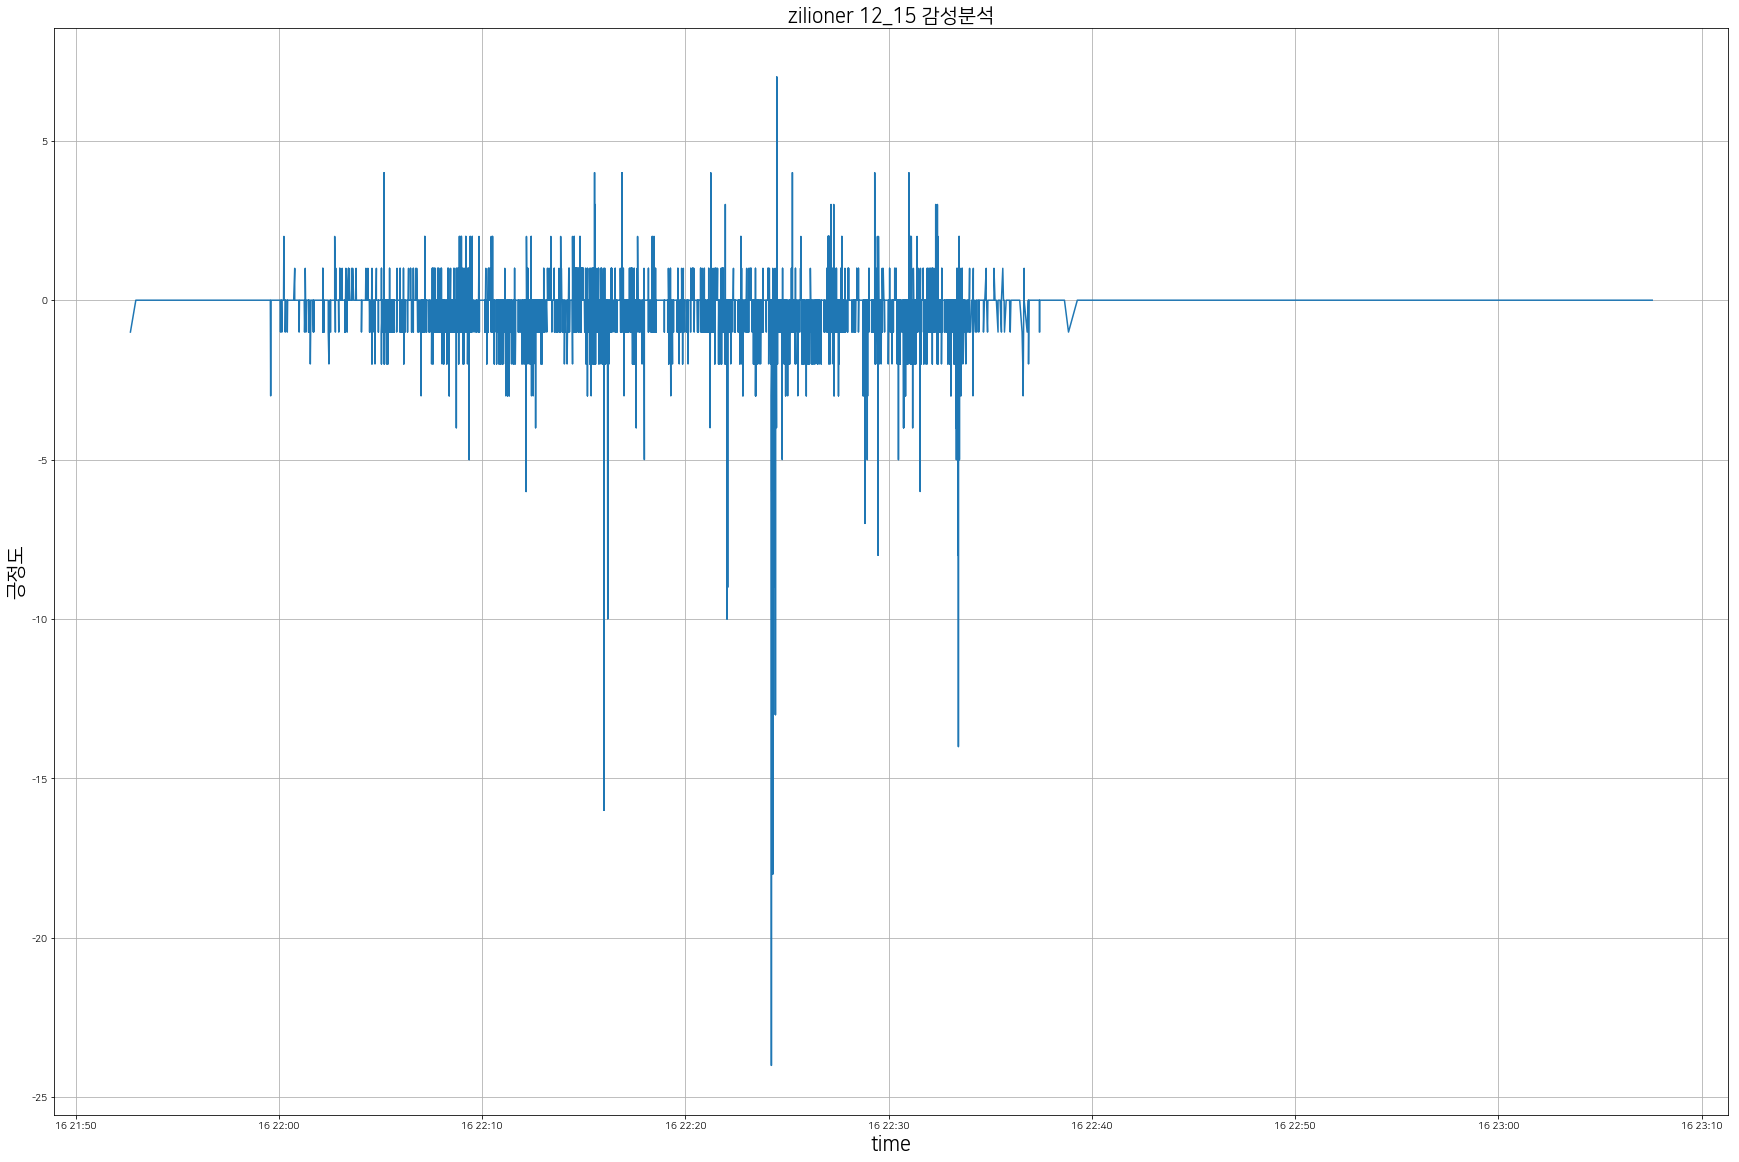

In [34]:
y1_value = score_list
x_name= df.index
# index = np_time
n_groups = len(x_name)
index = np.arange(n_groups)

plt.figure(figsize=(30,20))
plt.plot(df.index, y1_value)
plt.xlabel('time', fontsize = 20)
plt.ylabel('Í∏çÏ†ïÎèÑ',fontsize = 20)
plt.title('zilioner 12_15 Í∞êÏÑ±Î∂ÑÏÑù', fontsize = 20)
# plt.xlim( 0, n_groups)
# plt.xticks(n_groups)
# plt.ylim( -30, 15)
plt.grid(True)
plt.show()

In [35]:
series = pd.Series(df['Í∏çÏ†ïÎèÑ'], index=df.index) 
w = series.resample('Min').sum()

In [36]:
w

time
2019-01-16 21:52:00    -1
2019-01-16 21:53:00     0
2019-01-16 21:54:00     0
2019-01-16 21:55:00     0
2019-01-16 21:56:00     0
2019-01-16 21:57:00     0
2019-01-16 21:58:00     0
2019-01-16 21:59:00    -3
2019-01-16 22:00:00    -1
2019-01-16 22:01:00    -7
2019-01-16 22:02:00    -6
2019-01-16 22:03:00     5
2019-01-16 22:04:00    -5
2019-01-16 22:05:00   -33
2019-01-16 22:06:00    -8
2019-01-16 22:07:00   -29
2019-01-16 22:08:00   -48
2019-01-16 22:09:00   -26
2019-01-16 22:10:00    -8
2019-01-16 22:11:00   -36
2019-01-16 22:12:00   -79
2019-01-16 22:13:00   -10
2019-01-16 22:14:00    41
2019-01-16 22:15:00   -44
2019-01-16 22:16:00   -50
2019-01-16 22:17:00   -50
2019-01-16 22:18:00    -5
2019-01-16 22:19:00   -23
2019-01-16 22:20:00   -13
2019-01-16 22:21:00   -50
                       ..
2019-01-16 22:38:00    -1
2019-01-16 22:39:00     0
2019-01-16 22:40:00     0
2019-01-16 22:41:00     0
2019-01-16 22:42:00     0
2019-01-16 22:43:00     0
2019-01-16 22:44:00     0
2019-01

In [37]:
df_sum = pd.DataFrame(w)

In [38]:
df_sum.index = pd.to_datetime(df_sum.index).strftime('%H:%M:%S')

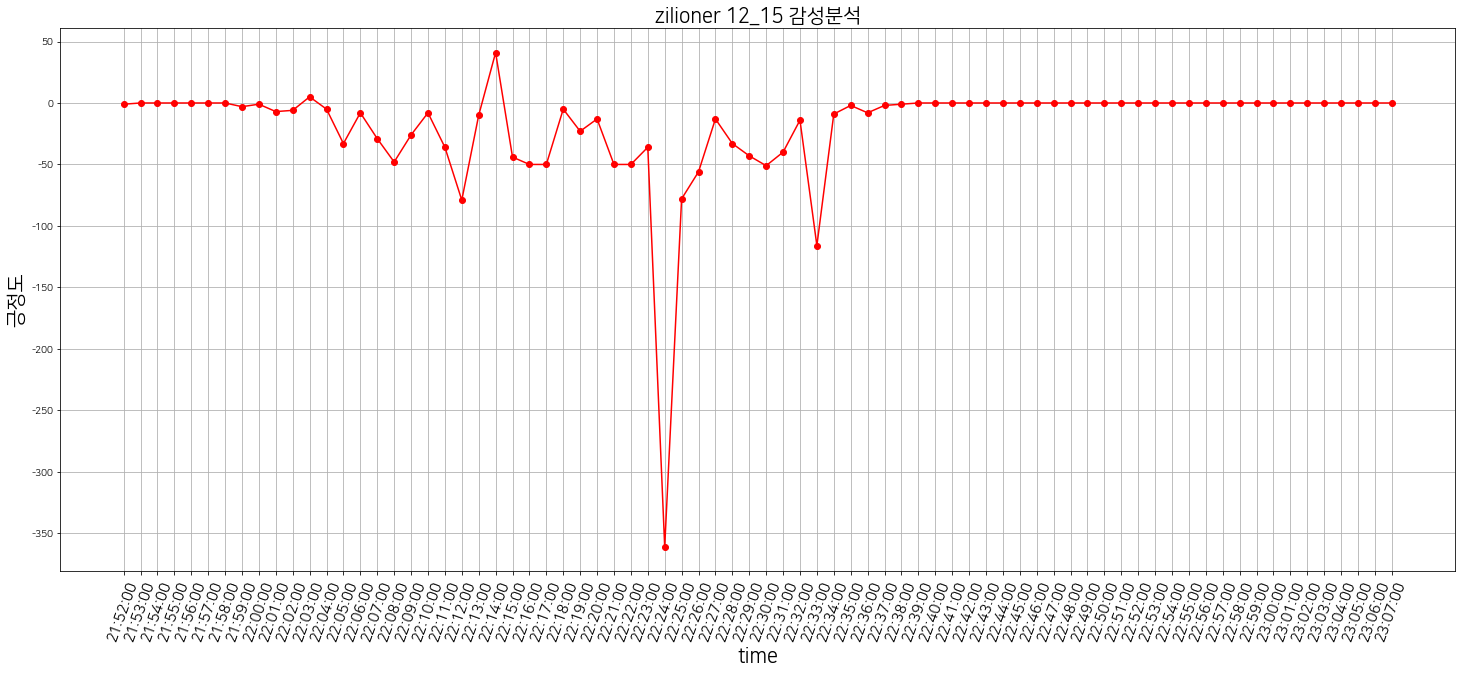

In [39]:
y1_value = df_sum['Í∏çÏ†ïÎèÑ']
x_name= df_sum.index
# index = np_time
n_groups = len(x_name)
index = np.arange(n_groups)

plt.figure(figsize=(25,10), edgecolor='c')
plt.plot(df_sum.index, y1_value, marker='o',color = 'r')
plt.xlabel('time', fontsize = 20)
plt.ylabel('Í∏çÏ†ïÎèÑ',fontsize = 20)
plt.title('zilioner 12_15 Í∞êÏÑ±Î∂ÑÏÑù', fontsize = 20)
# plt.xlim( 0, n_groups)
plt.xticks(df_sum.index, rotation = 70, fontsize=15)
# plt.ylim( -30, 15)
plt.grid(True)
plt.show()